Импорт библиотек

In [2]:
import os
from os import path
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller

3.1 Проверка ряда на стационарность

In [10]:
students = pd.read_csv('data/StudentsPerformance.csv')
df = students[['math score']]

alpha = 0.05
name = "Оценки"
ts = df['math score']
print(f'Тест Дики-Фуллера ряда "Оценки" :')

dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда "Оценки" :
Test Statistic                 -32.600161
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    999.000000
Critical Value (1%)             -3.436913
Critical Value (5%)             -2.864437
Critical Value (10%)            -2.568313
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


3.2 Удаление тренда, проверка на стационарность

In [11]:
nottrend = []
for i in range(1, len(df["math score"])):
   nottrend.append(df["math score"][i] - df["math score"][i-1])
ts = nottrend

print(f'Тест Дики-Фуллера ряда "Пасажиры без тренда" :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда "Пасажиры без тренда" :
Test Statistic                -1.278922e+01
p-value                        7.136416e-24
#Lags Used                     1.800000e+01
Number of Observations Used    9.800000e+02
Critical Value (1%)           -3.437040e+00
Critical Value (5%)           -2.864494e+00
Critical Value (10%)          -2.568343e+00
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


3.3 Удаление сезонности, проверка на стационарность

In [12]:
s = 6
notseason = []
for i in range(s, len(df["math score"])):
   notseason.append(df["math score"][i] - df["math score"][i-s])
ts = notseason

print(f'Тест Дики-Фуллера ряда "Пасажиры без сезонности" :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда "Пасажиры без сезонности" :
Test Statistic                -1.198836e+01
p-value                        3.568923e-22
#Lags Used                     1.700000e+01
Number of Observations Used    9.760000e+02
Critical Value (1%)           -3.437068e+00
Critical Value (5%)           -2.864506e+00
Critical Value (10%)          -2.568349e+00
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


3.4-3.6 AR модель и корелляции

Стандартное отклонение = 0.459543932504597
Среднее = 2.0892928167330145


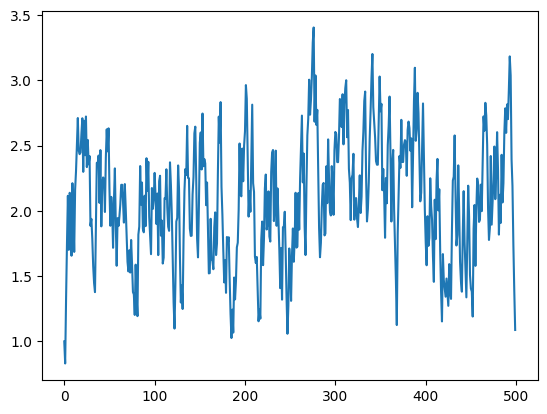

In [13]:
#Исходный случайный ряд

N = 500
ar1 = [1]
for i in range(1, N):
    ar1.append(0.76 * ar1[i-1] + np.random.random())
plt.plot(ar1)
print(f"Стандартное отклонение = {np.std(ar1)}\nСреднее = {np.mean(ar1)}")

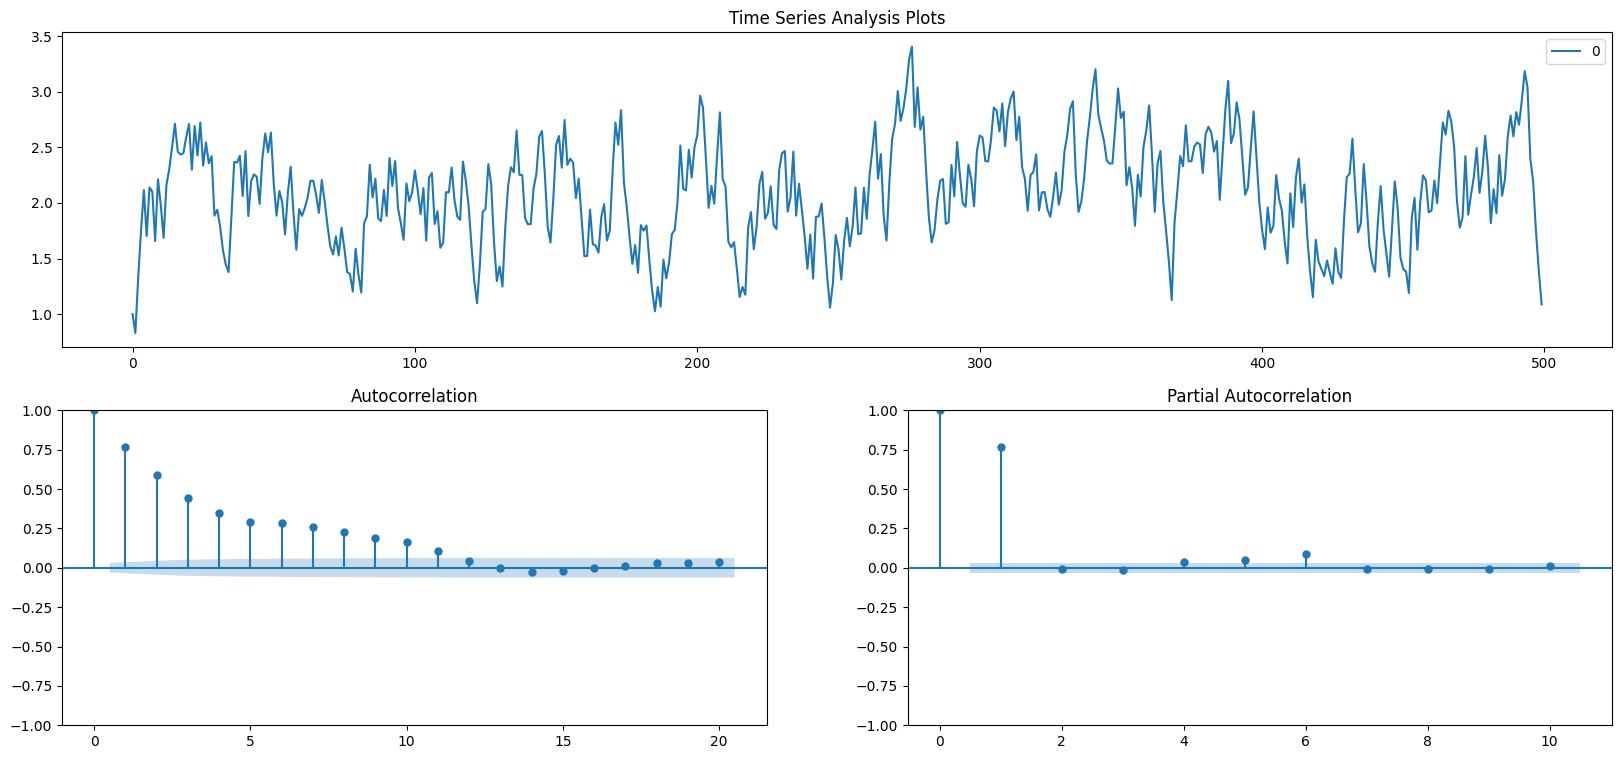

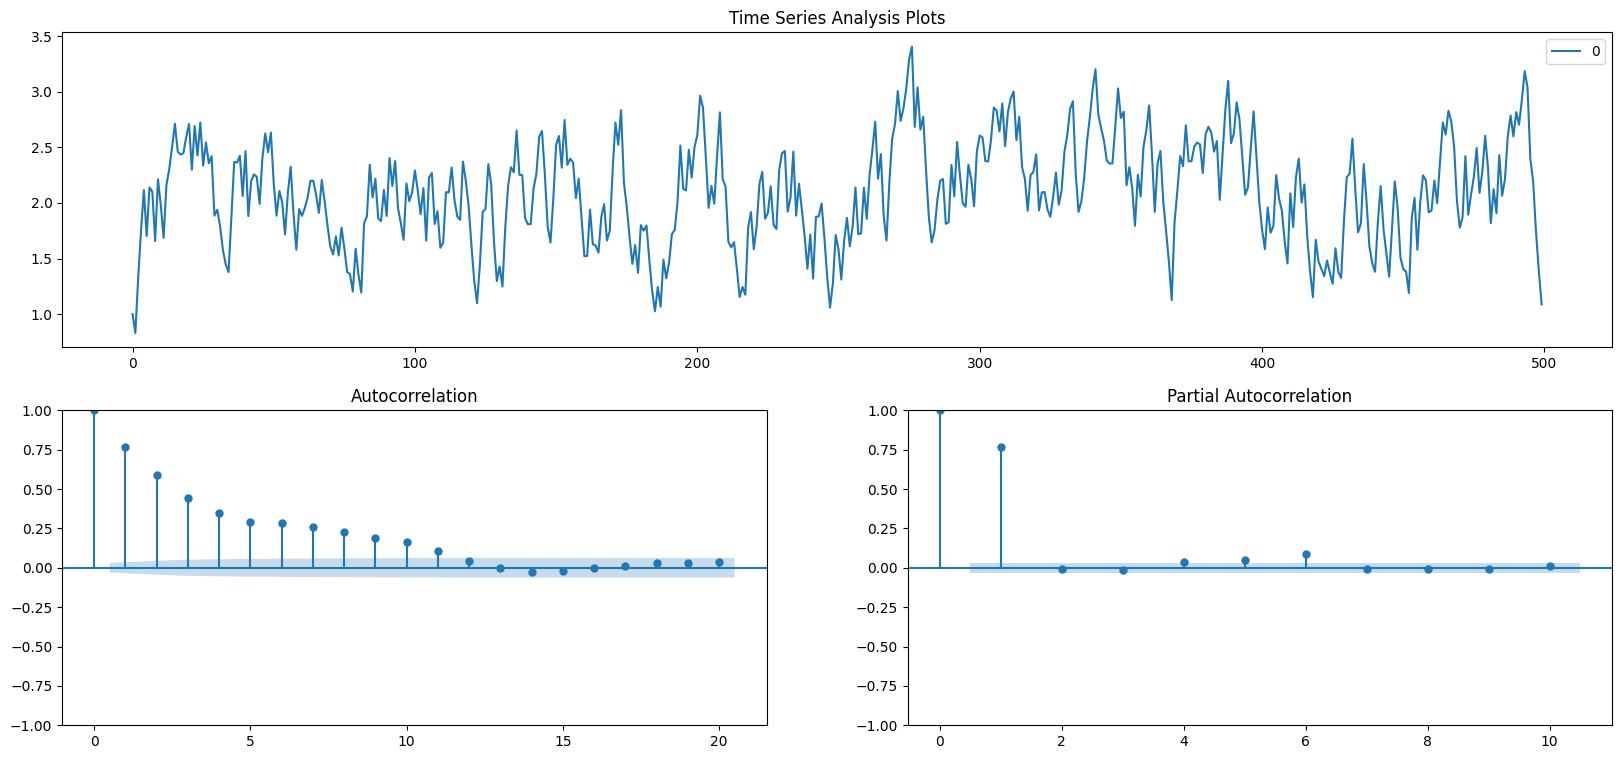

In [14]:
#Обычная и частичная автокорелляция

ts = pd.DataFrame(ar1)

fig = plt.figure(figsize=(20, 9))
layout = (2, 2)
ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
acf_ax = plt.subplot2grid(layout, (1, 0))
pacf_ax = plt.subplot2grid(layout, (1, 1))

ts.plot(ax=ts_ax)
ts_ax.set_title('Time Series Analysis Plots')
smt.graphics.plot_acf(ts, lags=20, ax=acf_ax, alpha=0.5)
smt.graphics.plot_pacf(ts, lags=10, ax=pacf_ax, alpha=0.5)

3.7 Оценка метрик (на примере StudentsPerformance.csv)

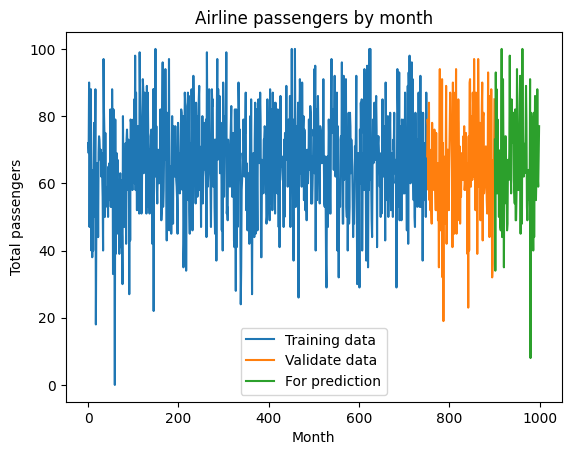

In [37]:
#AR модель, поделённая на выборки

students = pd.read_csv('data/StudentsPerformance.csv')
students = students[['math score']]
students.reset_index(inplace= True )
df = students.rename(columns={'index': 'n', 'math score': 'x'})
df['t'] = df.index.values
ln = len(df)

train_cutoff = int(round(ln*0.75, 0))
validate_cutoff = int(round(ln*0.90,0))

train_df = df[df['t'] <= train_cutoff]
validate_df = df[(df['t'] > train_cutoff) & (df['t'] <= validate_cutoff)]
forecast_df = df[df['t'] > validate_cutoff]

plt.plot(train_df.t, train_df.x, label='Training data')
plt.plot(validate_df.t, validate_df.x, label='Validate data')
plt.plot(forecast_df.t, forecast_df.x, label='For prediction')
plt.legend()
plt.title('Airline passengers by month')
plt.ylabel('Total passengers')
plt.xlabel('Month')
plt.show()

In [38]:
#Объект модели

from statsmodels.tsa.ar_model import AutoReg, ar_select_order
mod = AutoReg(df.t, 3, old_names=False)
res = mod.fit()

print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      t   No. Observations:                 1000
Model:                     AutoReg(3)   Log Likelihood               22341.840
Method:               Conditional MLE   S.D. of innovations              0.000
Date:                Fri, 08 Dec 2023   AIC                         -44673.680
Time:                        18:47:42   BIC                         -44649.157
Sample:                             3   HQIC                        -44664.358
                                 1000                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6667   9.46e-13   7.04e+11      0.000       0.667       0.667
t.L1           1.0000   9.45e-13   1.06e+12      0.000       1.000       1.000
t.L2           0.3333   1.64e-15   2.03e+14      0.0

In [39]:
#Модель с оценкой HC0

res = mod.fit(cov_type="HC0")
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      t   No. Observations:                 1000
Model:                     AutoReg(3)   Log Likelihood               22341.840
Method:               Conditional MLE   S.D. of innovations              0.000
Date:                Fri, 08 Dec 2023   AIC                         -44673.680
Time:                        18:47:46   BIC                         -44649.157
Sample:                             3   HQIC                        -44664.358
                                 1000                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6667      6e-13   1.11e+12      0.000       0.667       0.667
t.L1           1.0000   5.99e-13   1.67e+12      0.000       1.000       1.000
t.L2           0.3333    1.8e-15   1.85e+14      0.0

In [40]:
sel = ar_select_order(df.x, 13, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      x   No. Observations:                 1000
Model:                     AutoReg(0)   Log Likelihood               -4137.302
Method:               Conditional MLE   S.D. of innovations             15.155
Date:                Fri, 08 Dec 2023   AIC                           8278.604
Time:                        18:47:51   BIC                           8288.419
Sample:                             0   HQIC                          8282.334
                                 1000                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.0890      0.479    137.898      0.000      65.150      67.028


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


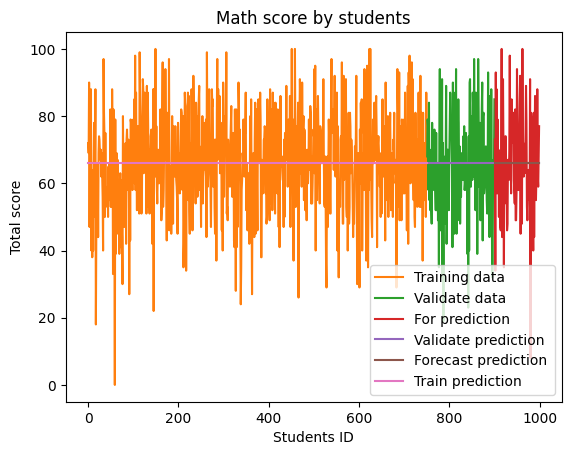

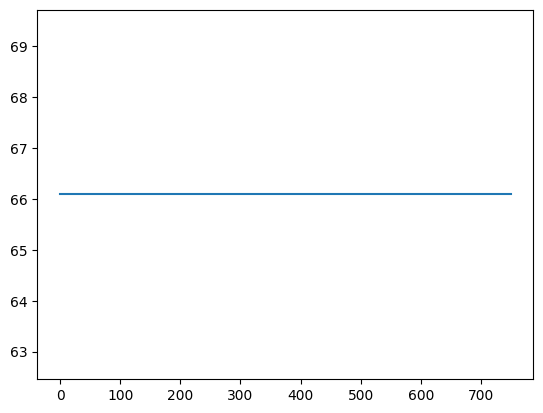

In [42]:
#Предсказание, график
fig = res.plot_predict(train_cutoff)
pred = res.predict(start=0, end=train_cutoff, dynamic=False)
v_pred = res.predict(start=train_cutoff+1, end=(validate_cutoff), dynamic=False)
f_pred = res.predict(start=validate_cutoff + 1, end=(forecast_df.t[len(df.t)-1]), dynamic=False)

plt.plot(train_df.t, train_df.x, label='Training data')
plt.plot(validate_df.t, validate_df.x, label='Validate data')
plt.plot(forecast_df.t, forecast_df.x, label='For prediction')
plt.plot(validate_df.t, v_pred, label='Validate prediction ')
plt.plot(forecast_df.t, f_pred, label='Forecast prediction')
plt.plot(train_df.t, pred, label='Train prediction')

plt.legend()
plt.title('Math score by students')
plt.ylabel('Total score')
plt.xlabel('Students ID')
plt.show()

plt.plot(pred)

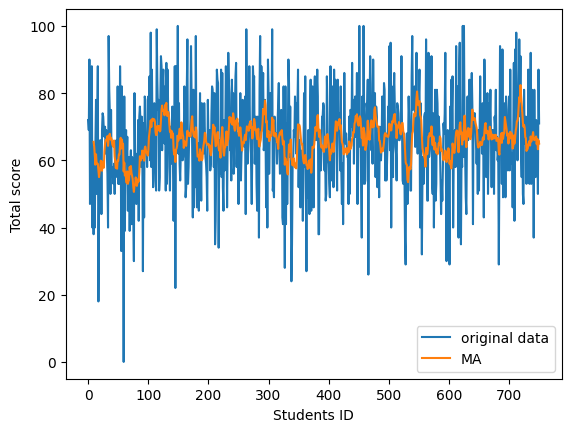

In [43]:
# MA
df['t'] = df.index.values
ln = len(df)
train_cutoff = int(round(ln*0.75, 0))
validate_cutoff = int(round(ln*0.90,0))

train_df = df[df['t'] <= train_cutoff]
validate_df = df[(df['t'] > train_cutoff) & (df['t'] <= validate_cutoff)]
forecast_df = df[df['t'] > validate_cutoff]

plt.plot(train_df["t"], train_df["x"], label="original data")
plt.plot(train_df["t"], train_df["x"].rolling(10).mean(), label="MA")
plt.legend()
plt.ylabel('Total score')
plt.xlabel('Students ID')
plt.show()

In [44]:
#Вывод, метрика
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score

print("RMSE:", np.sqrt(mean_squared_error(forecast_df.x, f_pred)))
print("MAPE:", mean_absolute_percentage_error(forecast_df.x, f_pred))
print("MAE:", mean_absolute_error(forecast_df.x, f_pred))
print("R2: ", r2_score(forecast_df.x, f_pred))

RMSE: 15.689094899890746
MAPE: 0.2599564902801212
MAE: 12.211222222222222
R2:  -0.00016898059231706952
